### Creating DataFrame

In [3]:
import pandas as pd

#Define file path add relative/absolute filepath to our data
#In my case the downloaded data was saved in drive D workspace
#I used an absolute path to my downloaded files.
path = r"D:\WorkSpace\Bike Mapping\201812-citibike-tripdata\201812-citibike-tripdata.csv"

data = pd.read_csv(path)
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,689,2018-12-01 00:00:04.3020,2018-12-01 00:11:33.8460,3359.0,E 68 St & Madison Ave,40.769157,-73.967035,164.0,E 47 St & 2 Ave,40.753231,-73.970325,35033,Subscriber,1989,1
1,204,2018-12-01 00:00:05.5330,2018-12-01 00:03:30.5230,3504.0,E 123 St & Lexington Ave,40.802926,-73.937900,3490.0,E 116 St & 2 Ave,40.796879,-73.937261,20501,Subscriber,1966,1
2,316,2018-12-01 00:00:10.2330,2018-12-01 00:05:27.2030,270.0,Adelphi St & Myrtle Ave,40.693083,-73.971789,243.0,Fulton St & Rockwell Pl,40.688226,-73.979382,18386,Subscriber,1984,1
3,726,2018-12-01 00:00:21.9570,2018-12-01 00:12:28.1830,495.0,W 47 St & 10 Ave,40.762699,-73.993012,3660.0,W 16 St & 8 Ave,40.741022,-74.001385,27616,Subscriber,1983,1
4,397,2018-12-01 00:00:29.6320,2018-12-01 00:07:07.4460,473.0,Rivington St & Chrystie St,40.721101,-73.991925,3467.0,W Broadway & Spring Street,40.724947,-74.001659,35096,Subscriber,1976,1


In [65]:
import pandas as pd

#Define file path add relative filepath to our data
path2 = r'./2018Dec.csv'

data1 = pd.read_csv(path2)
data1.head()

,Unnamed: 0,StationID,StationName,Lat,Lon
0,0,72.0,W 52 St & 11 Ave,40.767272,-73.993929
1,1,79.0,Franklin St & W Broadway,40.719116,-74.006667
2,2,82.0,St James Pl & Pearl St,40.711174,-74.000165
3,3,119.0,Park Ave & St Edwards St,40.696089,-73.978034
4,4,120.0,Lexington Ave & Classon Ave,40.686768,-73.959282


In [4]:
# Import necessary package pandas
import pandas as pd

# Define filepath either relative or absolute path to file
#In my case the downloaded data was saved in drive D/workspace
#I used an absolute path to my downloaded files.

path = r'D:\WorkSpace\Bike Mapping\201812-citibike-tripdata\201812-citibike-tripdata.csv'

# Open csv file
data = pd.read_csv(path)

# Check our data columns
print(data.columns)

# Group data by columns we are interested in our case station where ride started
group1 = data.groupby(['start station id',
       'start station name', 'start station latitude',
       'start station longitude'])

# Check our length of group
print(len(group1))

# Create a list to store our group keys
key = [key for key, _ in group1]

# Create a dataframe from the list
df = pd.DataFrame(key)

# Check our new dataframe first 5 rows
print(df.head)

# Rename our columns
df.rename(columns={0: 'StationID', 1: 'StationName', 2: 'Lat', 3: 'Lon'}, inplace=True)

# Saving the dataframe to csv file
outpath = r'./2018Dec.csv'
df.to_csv(outpath, index=False)

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')
796
<bound method NDFrame.head of           0                              1          2          3
0      72.0               W 52 St & 11 Ave  40.767272 -73.993929
1      79.0       Franklin St & W Broadway  40.719116 -74.006667
2      82.0         St James Pl & Pearl St  40.711174 -74.000165
3     119.0       Park Ave & St Edwards St  40.696089 -73.978034
4     120.0    Lexington Ave & Classon Ave  40.686768 -73.959282
..      ...                            ...        ...        ...
757  3716.0           40 Ave & Crescent St  40.753599 -73.937956
758  3718.0             E 11 St & Avenue B  40.727464 -73.979504
759  3719.0  S Portland Ave & Atlantic Ave  40.683223 

### Converting DataFrame to GeoDataFrame

In [5]:
# Import necessary package geopandas
import geopandas as gpd

#Read in our cleaned data
#Define file path add relative filepath to our data
path = r'../data/2018Dec.csv'

gdata = pd.read_csv(path)
gdata.head()

#Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(
    gdata, geometry=gpd.points_from_xy(gdata.Lon, gdata.Lat))
gdf.head()

,StationID,StationName,Lat,Lon,geometry
0,72.0,W 52 St & 11 Ave,40.767272,-73.993929,POINT (-73.99393 40.76727)
1,79.0,Franklin St & W Broadway,40.719116,-74.006667,POINT (-74.00667 40.71912)
2,82.0,St James Pl & Pearl St,40.711174,-74.000165,POINT (-74.00017 40.71117)
3,119.0,Park Ave & St Edwards St,40.696089,-73.978034,POINT (-73.97803 40.69609)
4,120.0,Lexington Ave & Classon Ave,40.686768,-73.959282,POINT (-73.95928 40.68677)


In [ ]:
#Assign crs to the geodataframe
gdf = gdf.set_crs('epsg:4326')
gdf.crs

In [54]:
# Let's make a backup copy of our data
gdf_merc = gdf.copy()
#We will use the backup in our subsequent analysis
gdf_merc = gdf_merc.to_crs(epsg=3857)
gdf_merc.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

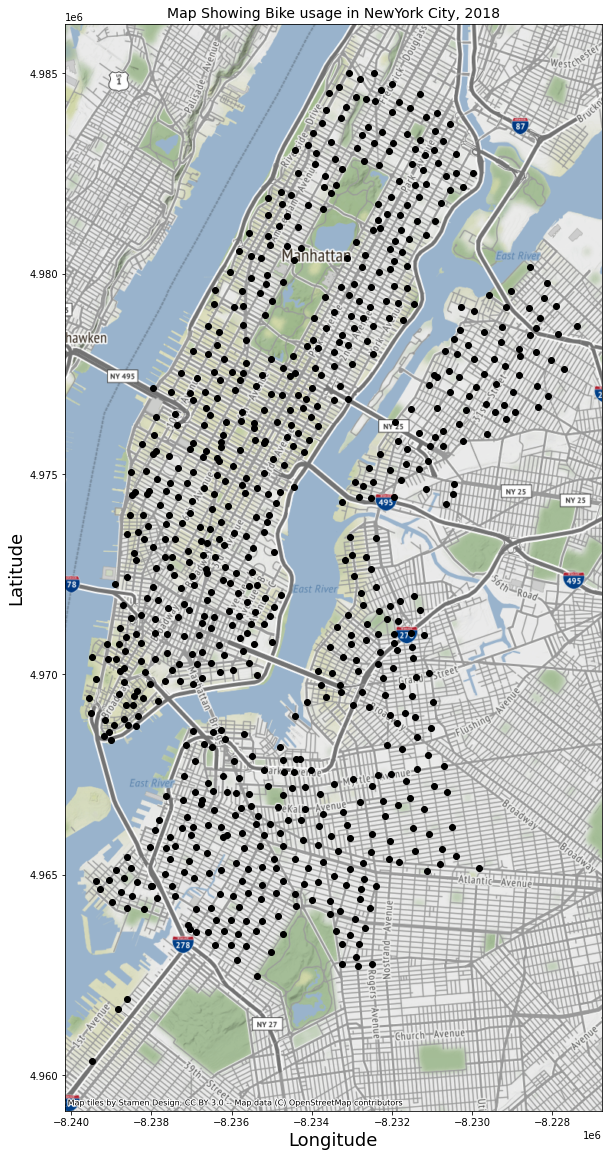

In [72]:
#Import matplotlib package for our plotting and contextly for our basemaps
import matplotlib.pyplot as plt
import contextily as ctx

# Create one subplot. Control figure size in here.
fig, ax = plt.subplots(figsize=(10,20))

#Plot the static map
gdf_merc.plot(ax=ax,c="black")

# Set title and label axes
plt.title("Map Showing Bike usage in NewYork City, 2018", 
          fontsize=14,color="black")
plt.xlabel('Longitude', fontsize=18)
plt.ylabel('Latitude', fontsize=18)

#Add basemap from contextly
ctx.add_basemap(ax)

#Save the figure as png file with resolution of 100 dpi
outfp = "2018_static_map.png"
plt.savefig(outfp, dpi=100)

In [55]:
#Interactive Map 
#Import folium package
import folium
m = gdf_merc.explore(name='Stations', )
#Add tiles
folium.TileLayer('Stamen Toner','OpenStreetMap', control=True).add_to(m)# use folium to add alternative tiles

#Add layer Control
folium.LayerControl().add_to(m)  # use folium to add layer control
m

In [ ]:
#Trying to read data direcly from webpage
